### Balanced dataframe (50/50 ratio)

### Import libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import validation_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.metrics import precision_recall_curve

### Load and explore data

In [98]:
dataframe = pd.read_csv('FinalDataFrame.csv')

In [99]:
dataframe.head(5)

,coil,analyse,Hardness_1,Hardness_2,Width,Temperature before finishing mill,Temperature after finishing mill,Thickness,c,mn,...,s,al,ma,b,n,ti,cr,va,mo,Target Label
0,404131,L971,17039.0,164.0,1326.1,1171.0,913.0,2.05,2037,21830,...,11,381,370,6,48,78,2066,28,27,0
1,511381,K371,9957.0,100.0,1101.5,1211.0,896.0,1.68,504,1924,...,84,378,365,1,18,7,206,4,10,0
2,532359,K371,9811.0,98.0,1293.5,1169.0,901.0,5.98,289,2051,...,167,257,248,1,36,5,282,0,37,0
3,440921,K821,10490.0,105.0,1211.2,1188.0,866.0,1.47,777,3547,...,123,324,312,1,42,10,255,1,20,0
4,431592,K371,9831.0,98.0,1100.2,1183.0,898.0,1.65,412,1691,...,71,310,310,0,58,5,157,1,2,0


In [100]:
dataframe = dataframe.set_index('coil')
dataframe.head(5)

,analyse,Hardness_1,Hardness_2,Width,Temperature before finishing mill,Temperature after finishing mill,Thickness,c,mn,si,...,s,al,ma,b,n,ti,cr,va,mo,Target Label
coil,,,,,,,,,,,,,,,,,,,,,
404131,L971,17039.0,164.0,1326.1,1171.0,913.0,2.05,2037,21830,15070,...,11,381,370,6,48,78,2066,28,27,0
511381,K371,9957.0,100.0,1101.5,1211.0,896.0,1.68,504,1924,68,...,84,378,365,1,18,7,206,4,10,0
532359,K371,9811.0,98.0,1293.5,1169.0,901.0,5.98,289,2051,35,...,167,257,248,1,36,5,282,0,37,0
440921,K821,10490.0,105.0,1211.2,1188.0,866.0,1.47,777,3547,135,...,123,324,312,1,42,10,255,1,20,0
431592,K371,9831.0,98.0,1100.2,1183.0,898.0,1.65,412,1691,71,...,71,310,310,0,58,5,157,1,2,0


In [101]:
dataframe.shape

(5935, 22)

In [102]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5935 entries, 404131 to 15623
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   analyse                            5935 non-null   object 
 1   Hardness_1                         5935 non-null   float64
 2   Hardness_2                         5935 non-null   float64
 3   Width                              5935 non-null   float64
 4   Temperature before finishing mill  5935 non-null   float64
 5   Temperature after finishing mill   5935 non-null   float64
 6   Thickness                          5935 non-null   float64
 7   c                                  5935 non-null   int64  
 8   mn                                 5935 non-null   int64  
 9   si                                 5935 non-null   int64  
 10  nb                                 5935 non-null   int64  
 11  p                                  5935 non-null  

In [103]:
dataframe.describe()

# Max outliers: Thickness and chemical compositions
# Use RobustScaler for outliers?

,Hardness_1,Hardness_2,Width,Temperature before finishing mill,Temperature after finishing mill,Thickness,c,mn,si,nb,...,s,al,ma,b,n,ti,cr,va,mo,Target Label
count,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,...,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000,5935.000000
mean,11363.057287,112.574726,1220.449412,1169.725190,916.542582,3.237589,640.357035,8035.498736,1081.113732,71.233361,...,72.616681,477.880708,463.394608,3.304465,38.156698,121.864195,796.886436,14.544398,66.212805,0.494524
std,1606.819885,18.273752,234.921434,23.892704,19.504378,0.952955,501.847706,8275.811508,2506.693190,149.251200,...,45.734044,519.807630,510.748721,5.893688,13.087313,197.806379,1021.841289,19.184319,203.169775,0.500012
min,9600.000000,87.000000,625.800000,1041.000000,820.000000,1.400000,12.000000,569.000000,18.000000,0.000000,...,0.000000,160.000000,148.000000,0.000000,0.000000,1.000000,79.000000,0.000000,0.000000,0.000000
25%,10043.000000,99.000000,1050.800000,1155.000000,906.000000,2.510000,358.000000,1936.500000,63.000000,0.000000,...,24.000000,320.000000,306.000000,1.000000,27.000000,9.000000,218.000000,0.000000,16.000000,0.000000
50%,10482.000000,103.000000,1242.000000,1171.000000,921.000000,3.200000,470.000000,2215.000000,103.000000,1.000000,...,79.000000,361.000000,347.000000,1.000000,38.000000,17.000000,267.000000,4.000000,20.000000,0.000000
75%,12602.000000,124.000000,1367.400000,1186.000000,929.000000,3.850000,762.000000,16360.000000,1954.000000,13.000000,...,109.000000,445.000000,431.500000,3.000000,47.000000,188.000000,445.000000,25.000000,26.000000,1.000000
max,17362.000000,167.000000,1904.900000,1255.000000,976.000000,8.000000,2351.000000,25900.000000,16910.000000,737.000000,...,285.000000,5986.000000,5881.000000,39.000000,115.000000,1249.000000,5651.000000,118.000000,1200.000000,1.000000


### Encode dataframe.analyse

Altneratively: cluster letters and drop the numbers, use one hot encoder

In [104]:
dataframe.analyse.unique()

array(['L971 ', 'K371 ', 'K821 ', 'LK41 ', 'LT41 ', 'LM41 ', 'K211 ',
       'KT21 ', 'L631 ', 'L721 ', 'KM81 ', 'N711 ', 'TB01 ', 'T251 ',
       'K321 ', 'LT71 ', 'KK81 ', 'L781 ', 'KM95 ', 'K111 ', 'T271 ',
       'L651 ', 'LK51 ', 'LK42 ', 'KN71 ', 'LM42 ', 'K571 ', 'K711 ',
       'K131 ', 'L711 ', 'L621 ', 'KT71 ', 'KM51 ', 'KN31 ', 'T221 ',
       'L671 ', 'KT31 ', 'KM41 ', 'KT91 ', 'L471 ', 'K391 ', 'K351 ',
       'LK21 ', 'KB31 ', 'KM21 ', 'NB01 ', 'L729 ', 'KK01 ', 'T212 ',
       'T218 ', 'KK22 ', 'KN51 ', 'T211 ', 'KT33 ', 'T231 ', 'K451 ',
       'KT24 ', 'LK61 ', 'L951 ', 'K101 ', 'LK71 ', 'KN21 ', 'NB03 ',
       'K201 ', 'K326 ', 'KM88 ', 'K208 ', 'K461 ', 'TB61 ', 'L782 ',
       'L851 ', 'TB51 ', 'K271 ', 'K171 ', 'KN41 ', 'LT49 ', 'KT32 ',
       'L741 ', 'L628 ', 'LT73 ', 'KN42 ', 'KN52 ', 'TB03 ', 'KM31 ',
       'K108 ', 'KK51 ', 'L698 ', 'KB38 ', 'T261 ', 'KM52 ', 'KM71 ',
       'L678 ', 'TB02 ', 'KM22 ', 'KK08 ', 'T214 ', 'KN38 ', 'L611 ',
       'KK28 ', 'K34

In [105]:
encoder = LabelEncoder()
dataframe['analyse'] = encoder.fit_transform(dataframe.analyse.values)

In [106]:
dataframe.analyse.unique()

array([101,  16,  26, 105, 116, 113,   8,  67,  82,  90,  48, 123, 137,
       134,  10, 118,  37,  95,  51,   3, 136,  83, 107, 106,  61, 114,
        22,  25,   4,  87,  80,  73,  44,  54, 131,  84,  69,  42,  74,
        75,  17,  15, 103,  29,  39, 124,  91,  31, 127, 130,  34,  58,
       126,  71, 132,  20,  68, 108,  99,   0, 109,  53, 125,   6,  12,
        50,   7,  21, 143,  96,  98, 141,   9,   5,  56, 117,  70,  92,
        81, 120,  57,  59, 139,  41,   2,  36,  86,  30, 135,  45,  47,
        85, 138,  40,  32, 129,  55,  79,  35,  14,  77,  94,  65,  11,
       133,  46,  33, 111,  23,  62,  76, 142,  88, 115, 140, 102,  13,
       128, 100,  52,  66,  43,  63,  78, 110,  60,  64,  72,  19,  38,
        49,  97,  28,  18,  93,   1,  27,  24, 104,  89, 119, 122, 121,
       112])

### Check for correlations between features

Use PCA for variables that strongly correlations? 

In [107]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=23):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(dataframe, 23))

Top Absolute Correlations
al          ma            0.999808
Hardness_1  Hardness_2    0.946185
mn          s             0.848289
Hardness_1  mn            0.847910
Hardness_2  mn            0.845759
mn          cr            0.804234
Hardness_1  s             0.788742
            si            0.776341
Hardness_2  s             0.771151
c           mn            0.766271
Hardness_2  c             0.765594
Hardness_1  c             0.764648
mn          va            0.753170
c           s             0.683735
Hardness_2  si            0.676852
s           cr            0.658608
c           si            0.657648
Hardness_1  va            0.641629
Hardness_2  n             0.630861
s           va            0.629731
Hardness_2  va            0.621728
mn          n             0.620224
b           mo            0.614166
dtype: float64


### Declare variabels, split train_test

In [108]:
X = dataframe.drop(columns = ['Target Label'])
y = dataframe['Target Label']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Observations: %d' % (len(X)), len(y))
print('Train Dataset:', X_train.shape, y_train.shape)
print('Test Dataset:', X_test.shape, y_test.shape)

Observations: 5935 5935
Train Dataset: (4748, 21) (4748,)
Test Dataset: (1187, 21) (1187,)


### Classification models

In [110]:
# Make pipelines
pipelineKNN = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', KNeighborsClassifier()) #step2 - classifier
])

pipelineSVM = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', SVC()) #step2 - classifier
])

pipelineNN = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', MLPClassifier()) #step2 - classifier
])

In [62]:
dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": pipelineKNN,
    "Support Vector Machine": pipelineSVM,
    "Gradient Boosting Classifier": XGBClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Neural Net": pipelineNN,
    "Naive Bayes": GaussianNB()
}

In [63]:
no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)),
                              columns = ['Classifiers', 'Train_score', 'Training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.process_time()
        classifier.fit(X_train, y_train)
        t_end = time.process_time()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, y_train)
        df_results.loc[count,'Classifiers'] = key
        df_results.loc[count, 'Train_score'] = train_score
        df_results.loc[count, 'Training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [64]:
df_results = batch_classify(X_train, y_train)
print(df_results.sort_values(by='Train_score', ascending=True))

trained Logistic Regression in 0.25 s
trained Nearest Neighbors in 0.04 s
trained Support Vector Machine in 0.96 s
[15:13:19] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
trained Gradient Boosting Classifier in 3.30 s
trained Decision Tree in 0.39 s
trained Random Forest in 1.59 s
trained Neural Net in 15.24 s
trained Naive Bayes in 0.01 s
                    Classifiers  Train_score  Training_time
0           Logistic Regression     0.622578       0.252629
7                   Naive Bayes     0.671441       0.014566
2        Support Vector Machine     0.810447       0.962726
6                    Neural Net     0.837195      15.239895
1             Nearest Neighbors     0.845198       0.044328
3  Gradient Boosting Classifier     0.992418       3.302093
5           

### Random Forest: further finetuning

#### Validation curves

In [17]:
rf = RandomForestClassifier()
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


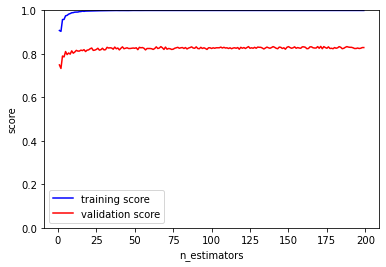

In [18]:
param_range = np.arange(1, 200)

train_score, val_score = validation_curve(RandomForestClassifier(), X_train, y_train,
                                                        param_name='n_estimators', 
                                                        param_range=param_range,
                                                        scoring='accuracy',cv=10, n_jobs=-1)
plt.plot(param_range, np.median(train_score, 1), color='blue', label='training score')
plt.plot(param_range, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()

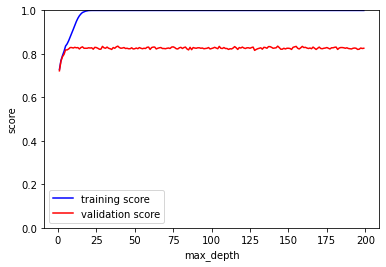

In [19]:
param_range = np.arange(1, 200)

train_score, val_score = validation_curve(RandomForestClassifier(), X_train, y_train,
                                                        param_name='max_depth', 
                                                        param_range=param_range,
                                                        scoring='accuracy',cv=10, n_jobs=-1)
plt.plot(param_range, np.median(train_score, 1), color='blue', label='training score')
plt.plot(param_range, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('max_depth')
plt.ylabel('score')
plt.show()

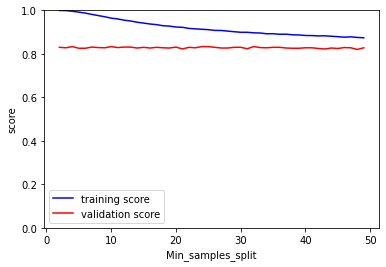

In [21]:
param_range = np.arange(1, 50)

train_score, val_score = validation_curve(RandomForestClassifier(), X_train, y_train,
                                                        param_name='min_samples_split', 
                                                        param_range=param_range,
                                                        scoring='accuracy',cv=10, n_jobs=-1)
plt.plot(param_range, np.median(train_score, 1), color='blue', label='training score')
plt.plot(param_range, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('Min_samples_split')
plt.ylabel('score')
plt.show()

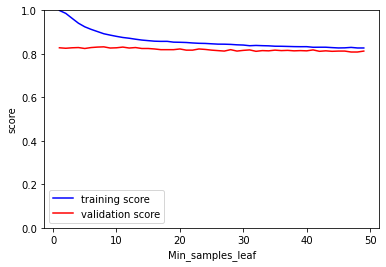

In [22]:
param_range = np.arange(1, 50)

train_score, val_score = validation_curve(RandomForestClassifier(), X_train, y_train,
                                                        param_name='min_samples_leaf', 
                                                        param_range=param_range,
                                                        scoring='accuracy',cv=10, n_jobs=-1)
plt.plot(param_range, np.median(train_score, 1), color='blue', label='training score')
plt.plot(param_range, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('Min_samples_leaf')
plt.ylabel('score')
plt.show()

#### Random Search

In [23]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 2, stop = 20, num = 2)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(0, 25, num = 1)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [30, 40, 50]
# Minimum number of samples required at each leaf node
min_samples_leaf = [30, 40, 50]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [2, 20], 'max_features': ['auto', 'sqrt'], 'max_depth': [0, None], 'min_samples_split': [30, 40, 50], 'min_samples_leaf': [30, 40, 50], 'bootstrap': [True, False]}


In [24]:
rf_random = RandomizedSearchCV(RandomForestClassifier(), random_grid, n_iter = 100, cv = 10, verbose=1, 
                               random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 344 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 844 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   49.3s finished


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [0, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [30, 40, 50],
                                        'min_samples_split': [30, 40, 50],
                                        'n_estimators': [2, 20]},
                   random_state=42, verbose=1)

In [19]:
rf_random.best_params_

NameError: name 'rf_random' is not defined

In [111]:
random_model = RandomForestClassifier(n_estimators=20,min_samples_split=30,
                                             min_samples_leaf=30,max_features='sqrt',
                                             max_depth=None,bootstrap=False)
random_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_features='sqrt',
                       min_samples_leaf=30, min_samples_split=30,
                       n_estimators=20)

In [36]:
random_accuracy = random_model.score(X_train, y_train)
print("Evaluating the random model on the training set yields an accuracy of {}%".format(random_accuracy*100))
random_accuracy = random_model.score(X_test, y_test)
print("Evaluating the random model on the testing set yields an accuracy of {:.2f}%".format(random_accuracy*100))

Evaluating the random model on the training set yields an accuracy of 85.85313174946005%
Evaluating the random model on the testing set yields an accuracy of 81.52%


#### Grid Search

In [29]:
param_grid = {
    'bootstrap': [False],
    'max_depth': [None],
    'max_features': ['sqrt'],
    'min_samples_leaf': [25, 30, 35],
    'min_samples_split': [25, 30, 35],
    'n_estimators': [16, 18, 20, 22, 24]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv = 10, 
                           n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  1.9min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [None],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [25, 30, 35],
                         'min_samples_split': [25, 30, 35],
                         'n_estimators': [16, 18, 20, 22, 24]},
             verbose=2)

In [30]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 25,
 'min_samples_split': 35,
 'n_estimators': 22}

In [112]:
grid_model = RandomForestClassifier(n_estimators=22,min_samples_split=35,
                                             min_samples_leaf=25,max_features='sqrt',
                                             max_depth=None,bootstrap=False)
grid_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_features='sqrt',
                       min_samples_leaf=25, min_samples_split=35,
                       n_estimators=22)

In [113]:
grid_accuracy = grid_model.score(X_train, y_train)
print("Evaluating the grid model on the training set yields an accuracy of {}%".format(grid_accuracy*100))
grid_accuracy = grid_model.score(X_test, y_test)
print("Evaluating the grid model on the testing set yields an accuracy of {:.2f}%".format(grid_accuracy*100))

Evaluating the grid model on the training set yields an accuracy of 85.27801179443976%
Evaluating the grid model on the testing set yields an accuracy of 80.54%


### Make prediction & evaluation 

In [114]:
# Make prediction
y_pred = grid_model.predict(X_test)
print(y_pred)

[1 0 1 ... 0 0 1]


In [115]:
kf = KFold(n_splits=10)
cv_scores = cross_val_score(grid_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std()))
# the actual MSE is the number we get hear but positive

MSE: -0.19 (+/- 0.02)


In [116]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,462,139,601
1,92,494,586
All,554,633,1187


if there is a trade off between false positives and false negatives: do we rather have our model predicting not shearing whilst the coil shears or the other way around

In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       601
           1       0.78      0.84      0.81       586

    accuracy                           0.81      1187
   macro avg       0.81      0.81      0.81      1187
weighted avg       0.81      0.81      0.81      1187



In [118]:
# ROC curves
y_scores = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
auc = roc_auc_score(y_test, y_scores)
print(auc)

# get the best threshold
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold for Grid model=%f, G-Mean=%.3f' % (thresholds[ix], 
                                                         gmeans[ix]))

0.8744030143162987
Best Threshold for Grid model=0.528480, G-Mean=0.807


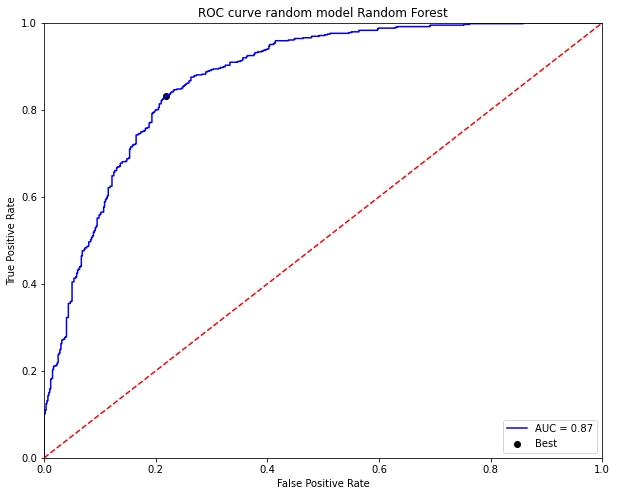

In [119]:
plt.figure(figsize = (10,8))
plt.title('ROC curve random model Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [120]:
matthews_corr = matthews_corrcoef(y_test,y_pred)
print(matthews_corr)

0.6130325842861094


### Learning curve

In [76]:
train_sizes = [1000, 2000, 2500, 3000, 3500, 4000] # absolute numbers that must be within (0,21707)

train_sizes, train_scores, validation_scores = learning_curve(grid_model, X_train, y_train, 
                                                              train_sizes = train_sizes,
                                                              cv = 10, 
                                                              scoring = 'accuracy')

In [77]:
train_scores_mean = train_scores.mean(axis = 1)
print(train_scores_mean)
validation_scores_mean = validation_scores.mean(axis = 1)
print(validation_scores_mean)

[0.8373     0.8413     0.84256    0.8435     0.84962857 0.849025  ]
[0.76684388 0.79358916 0.79801466 0.80327826 0.80580813 0.81086076]


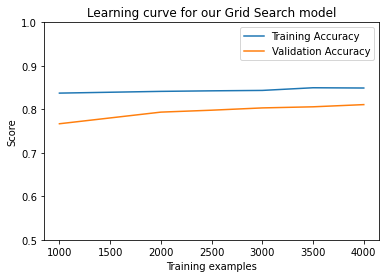

In [79]:
plt.plot(train_sizes, train_scores_mean, label = 'Training Accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation Accuracy')
plt.ylabel('Score')
plt.xlabel('Training examples')
plt.title('Learning curve for our Grid Search model')
plt.ylim(0.5,1)
plt.legend(loc='best')
plt.show()
# This model needs more data as we see that orange and blue line are converging closer
# accuracy is slightly increasing

### Feature importance

Feature ranking:
1. feature 6 (0.258530)
2. feature 10 (0.107809)
3. feature 7 (0.090251)
4. feature 3 (0.088512)
5. feature 8 (0.080427)
6. feature 9 (0.050725)
7. feature 2 (0.039769)
8. feature 1 (0.037858)
9. feature 0 (0.035867)
10. feature 5 (0.035185)
11. feature 18 (0.029862)
12. feature 17 (0.025876)
13. feature 16 (0.021134)
14. feature 11 (0.015917)
15. feature 20 (0.014122)
16. feature 13 (0.013667)
17. feature 12 (0.012065)
18. feature 4 (0.011387)
19. feature 19 (0.010857)
20. feature 14 (0.010129)
21. feature 15 (0.010052)


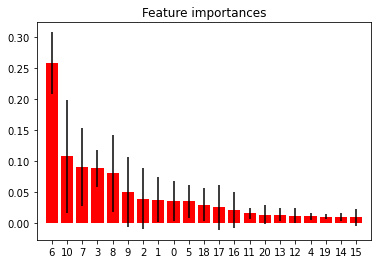

In [121]:
importances = grid_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in grid_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [122]:
d = {f'f{i}': c for i, c in enumerate(dataframe.columns, 1)}
d

{'f1': 'analyse',
 'f2': 'Hardness_1',
 'f3': 'Hardness_2',
 'f4': 'Width',
 'f5': 'Temperature before finishing mill',
 'f6': 'Temperature after finishing mill',
 'f7': 'Thickness',
 'f8': 'c',
 'f9': 'mn',
 'f10': 'si',
 'f11': 'nb',
 'f12': 'p',
 'f13': 's',
 'f14': 'al',
 'f15': 'ma',
 'f16': 'b',
 'f17': 'n',
 'f18': 'ti',
 'f19': 'cr',
 'f20': 'va',
 'f21': 'mo',
 'f22': 'Target Label'}

Top 5 features with most explanatory power: Temperature after finishing mill, hardness_2, Thikness, si, hardness_1, c

Top 5 features with least explanantory power: b,va,nb,width, al

Drop all features that don't add at least 1% to the accuracy of our model

### Features that significantly impact wheather or not a coil shears

In [157]:
new_frame = dataframe[['Temperature after finishing mill', #
                       'Hardness_2', # 
                       'Thickness', #
                       'si', # 
                       'Hardness_1',#
                       'nb',#
                       'Width',#
                       'c',#
                       'mn',#
                       'analyse',#
                       'Hardness_1',#
                       'ti',#
                       'cr',#
                       'p',#
                       'n',#
                       'Temperature before finishing mill',#
                       'Target Label']]

In [158]:
new_frame.head(5)

,Temperature after finishing mill,Hardness_2,Thickness,si,Hardness_1,nb,Width,c,mn,analyse,Hardness_1,ti,cr,p,n,Temperature before finishing mill,Target Label
coil,,,,,,,,,,,,,,,,,
404131,913.0,164.0,2.05,15070,17039.0,22,1326.1,2037,21830,101,17039.0,78,2066,104,48,1171.0,0
511381,896.0,100.0,1.68,68,9957.0,0,1101.5,504,1924,16,9957.0,7,206,87,18,1211.0,0
532359,901.0,98.0,5.98,35,9811.0,0,1293.5,289,2051,16,9811.0,5,282,98,36,1169.0,0
440921,866.0,105.0,1.47,135,10490.0,0,1211.2,777,3547,26,10490.0,10,255,164,42,1188.0,0
431592,898.0,98.0,1.65,71,9831.0,2,1100.2,412,1691,16,9831.0,5,157,90,58,1183.0,0


In [159]:
X = new_frame.drop(columns = ['Target Label'])
y = new_frame['Target Label']

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Observations: %d' % (len(X)), len(y))
print('Train Dataset:', X_train.shape, y_train.shape)
print('Test Dataset:', X_test.shape, y_test.shape)

Observations: 5935 5935
Train Dataset: (4748, 16) (4748,)
Test Dataset: (1187, 16) (1187,)


In [155]:
grid_model = RandomForestClassifier(n_estimators=22,min_samples_split=35,
                                             min_samples_leaf=25,max_features='sqrt',
                                             max_depth=None,bootstrap=False)
grid_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_features='sqrt',
                       min_samples_leaf=25, min_samples_split=35,
                       n_estimators=22)

In [156]:
grid_accuracy = grid_model.score(X_train, y_train)
print("Evaluating the grid model on the training set yields an accuracy of {}%".format(grid_accuracy*100))
grid_accuracy = grid_model.score(X_test, y_test)
print("Evaluating the grid model on the testing set yields an accuracy of {:.2f}%".format(grid_accuracy*100))

Evaluating the grid model on the training set yields an accuracy of 84.66722830665543%
Evaluating the grid model on the testing set yields an accuracy of 80.29%


In [150]:
# Make prediction
y_pred = grid_model.predict(X_test)
print(y_pred)

[1 0 1 ... 0 0 1]


In [129]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,445,156,601
1,112,474,586
All,557,630,1187


In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       601
           1       0.75      0.81      0.78       586

    accuracy                           0.77      1187
   macro avg       0.78      0.77      0.77      1187
weighted avg       0.78      0.77      0.77      1187



In [134]:
feature_list = list(X)
# Get numerical feature importances
importances = list(grid_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: Thickness            Importance: 0.26
Variable: nb                   Importance: 0.11
Variable: Width                Importance: 0.09
Variable: c                    Importance: 0.09
Variable: mn                   Importance: 0.08
Variable: si                   Importance: 0.05
Variable: analyse              Importance: 0.04
Variable: Hardness_1           Importance: 0.04
Variable: Hardness_2           Importance: 0.04
Variable: Temperature after finishing mill Importance: 0.04
Variable: ti                   Importance: 0.03
Variable: cr                   Importance: 0.03
Variable: p                    Importance: 0.02
Variable: n                    Importance: 0.02
Variable: Temperature before finishing mill Importance: 0.01
Variable: s                    Importance: 0.01
Variable: al                   Importance: 0.01
Variable: ma                   Importance: 0.01
Variable: b                    Importance: 0.01
Variable: va                   Importance: 0.01
Variable: mo   

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

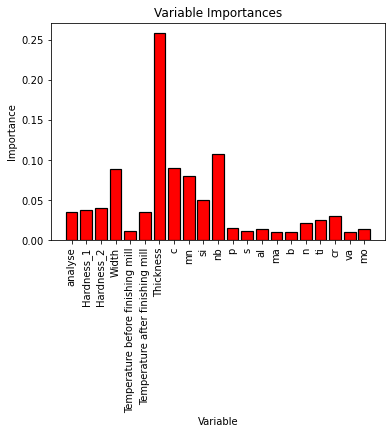

In [135]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

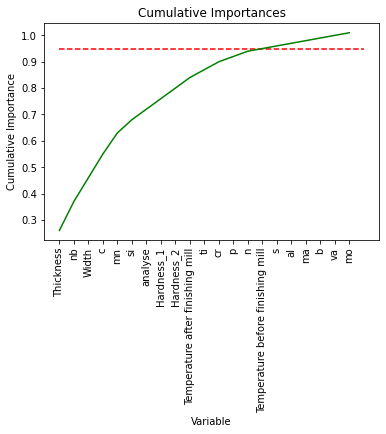

In [136]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [137]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 15


We can reduce dimensionality : 23 features to 15 features

### Test with balanced dataset (60/40 ratio)

In [80]:
balanced = pd.read_csv('DF6040ratio.csv')

In [81]:
balanced = balanced.set_index('coil')
balanced.head(5)

,analyse,Hardness_1,Hardness_2,Width,Temperature before finishing mill,Temperature after finishing mill,Thickness,c,mn,si,...,s,al,ma,b,n,ti,cr,va,mo,Target Label
coil,,,,,,,,,,,,,,,,,,,,,
404131,L971,17039.0,164.0,1326.1,1171.0,913.0,2.05,2037,21830,15070,...,11,381,370,6,48,78,2066,28,27,0
511381,K371,9957.0,100.0,1101.5,1211.0,896.0,1.68,504,1924,68,...,84,378,365,1,18,7,206,4,10,0
532359,K371,9811.0,98.0,1293.5,1169.0,901.0,5.98,289,2051,35,...,167,257,248,1,36,5,282,0,37,0
440921,K821,10490.0,105.0,1211.2,1188.0,866.0,1.47,777,3547,135,...,123,324,312,1,42,10,255,1,20,0
431592,K371,9831.0,98.0,1100.2,1183.0,898.0,1.65,412,1691,71,...,71,310,310,0,58,5,157,1,2,0


In [82]:
encoder = LabelEncoder()
balanced['analyse'] = encoder.fit_transform(balanced.analyse.values)

In [83]:
balanced.analyse.unique()

array([110,  17,  28, 115, 128, 123,   8,  75,  91,  99,  54, 135, 150,
       147,  10, 130,  41, 104,  57,   3, 149,  92, 117, 116,  68, 124,
        23,  26,   4,  96,  89,  82,  50,  61, 144,  93,  77,  47,  83,
        84,  18,  15, 113,  31,  44, 136, 100,  33, 140, 143,  37,  65,
       139,  79, 145,  21,  76, 118, 108,   0, 119,  59, 137,   6,  12,
        56,   7,  22, 156, 105, 107, 154,   9,   5,  63, 129,  78, 101,
        90, 132,  64,  66, 152,  46,   2,  39,  95,  32, 148,  51,  53,
        94, 151,  45,  34, 142,  62,  88,  38,  14,  86, 103,  73,  11,
       146,  52,  36, 121,  24,  69,  85, 155,  97, 125, 153, 111,  13,
       141, 109,  58,  74,  48,  70,  87, 120,  67,  72,  80,  20,  43,
        55, 106,  30,  19, 114,  60, 112,  35, 157,  81,   1, 138, 127,
       134,  49,  16,  27,  40,  71, 126, 158,  42, 102,  29,  25,  98,
       131, 133, 122])

In [84]:
X = new_frame.drop(columns = ['Target Label'])
y = new_frame['Target Label']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Observations: %d' % (len(X)), len(y))
print('Train Dataset:', X_train.shape, y_train.shape)
print('Test Dataset:', X_test.shape, y_test.shape)

Observations: 5935 5935
Train Dataset: (4748, 4) (4748,)
Test Dataset: (1187, 4) (1187,)


In [86]:
grid_model = RandomForestClassifier(n_estimators=22,min_samples_split=35,
                                             min_samples_leaf=25,max_features='sqrt',
                                             max_depth=None,bootstrap=False)
grid_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, max_features='sqrt',
                       min_samples_leaf=25, min_samples_split=35,
                       n_estimators=22)

In [87]:
grid_accuracy = grid_model.score(X_train, y_train)
print("Evaluating the grid model on the training set yields an accuracy of {}%".format(grid_accuracy*100))
grid_accuracy = grid_model.score(X_test, y_test)
print("Evaluating the grid model on the testing set yields an accuracy of {:.2f}%".format(grid_accuracy*100))

Evaluating the grid model on the training set yields an accuracy of 81.59224936815501%
Evaluating the grid model on the testing set yields an accuracy of 77.93%


In [88]:
# Make prediction
y_pred = grid_model.predict(X_test)
print(y_pred)

[1 0 1 ... 0 0 1]


In [89]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,452,149,601
1,113,473,586
All,565,622,1187


In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.75      0.78       601
           1       0.76      0.81      0.78       586

    accuracy                           0.78      1187
   macro avg       0.78      0.78      0.78      1187
weighted avg       0.78      0.78      0.78      1187



In [91]:
matthews_corr = matthews_corrcoef(y_test,y_pred)
print(matthews_corr)

0.5598483084210276


### Test with imbalanced dataset (90/10 ratio)

In [53]:
data = pd.read_csv('ImbalancedFrameForML.csv')
data.head(5)

,coil,furnace Number,analyse,Hardness_1,Hardness_2,Width,Temperature before finishing mill,Temperature after finishing mill,Thickness,c,...,s,al,ma,b,n,ti,cr,va,mo,Target Label
0,432092,4.0,LK51,12897.0,135.0,806.8,1178.0,873.0,3.02,756,...,31,343,334,3,40,21,387,0,38,0
1,480675,1.0,L761,12216.0,104.0,1603.8,1166.0,944.0,4.30,635,...,113,516,499,2,52,15,288,19,30,0
2,454915,1.0,K371,10515.0,107.0,1420.4,1180.0,924.0,3.92,426,...,98,413,397,1,34,16,237,40,19,0
3,483280,3.0,KM51,11622.0,121.0,1611.8,1172.0,867.0,5.02,702,...,65,400,380,1,32,11,239,0,31,0
4,510514,3.0,K321,10034.0,100.0,1360.8,1164.0,921.0,3.03,417,...,129,407,407,0,43,4,364,4,23,0


In [62]:
data.isnull().sum()

coil                                 0
furnace Number                       0
analyse                              0
Hardness_1                           1
Hardness_2                           1
Width                                0
Temperature before finishing mill    0
Temperature after finishing mill     0
Thickness                            0
c                                    0
mn                                   0
si                                   0
nb                                   0
p                                    0
s                                    0
al                                   0
ma                                   0
b                                    0
n                                    0
ti                                   0
cr                                   0
va                                   0
mo                                   0
Target Label                         0
dtype: int64

In [63]:
data.dropna(inplace=True)

In [64]:
len(data)

20037

In [65]:
data.analyse.unique()

array([147, 132,  20,  63,  13,   5, 189, 124,  69, 152, 140,  78, 202,
       177, 108, 188,  28,  10, 119, 201,  49, 101, 115, 193, 184,   9,
        35,  26,  71, 191, 120, 164, 127, 143,  39, 139,  81, 149,   4,
       145,  53, 118, 183,  15,  87,  96,  18, 200,  72,   1, 133, 186,
       178,  75,  93,  12,  88,  30,  22, 116, 165, 156,  60,   8, 204,
       138,  76,  52, 158,  33,  29,  50,  74, 170,  48,  98, 172,  27,
       198, 162, 100, 195,  86, 182,  83, 146,   7,  21,   6,  11, 194,
        16,  23,  59, 196, 134, 112, 114,  41,  14,  17, 113,  42,  91,
       176, 130, 173, 135, 181,  97, 131,  67,   3,  64,  36,  19, 142,
       157,  44,  82,  37, 111, 122,  25,  61,  31, 166, 125, 121, 128,
        47,  43,  54, 153, 180, 197, 129,  85, 160, 105,  46, 110,  84,
        38, 174,  56,  66, 199, 155,  80, 117, 167,   2,  34, 161, 203,
       192, 154,  65, 168, 136,  99,  89, 179, 102,  70,  77, 141,  40,
       104,  45, 163, 103, 151, 148,  73,  55,  24,  68, 106, 18

In [66]:
encoder = LabelEncoder()
data['analyse'] = encoder.fit_transform(data.analyse.values)

In [67]:
data.analyse.unique()

array([146, 131,  19,  62,  12,   4, 188, 123,  68, 151, 139,  77, 201,
       176, 107, 187,  27,   9, 118, 200,  48, 100, 114, 192, 183,   8,
        34,  25,  70, 190, 119, 163, 126, 142,  38, 138,  80, 148,   3,
       144,  52, 117, 182,  14,  86,  95,  17, 199,  71,   0, 132, 185,
       177,  74,  92,  11,  87,  29,  21, 115, 164, 155,  59,   7, 203,
       137,  75,  51, 157,  32,  28,  49,  73, 169,  47,  97, 171,  26,
       197, 161,  99, 194,  85, 181,  82, 145,   6,  20,   5,  10, 193,
        15,  22,  58, 195, 133, 111, 113,  40,  13,  16, 112,  41,  90,
       175, 129, 172, 134, 180,  96, 130,  66,   2,  63,  35,  18, 141,
       156,  43,  81,  36, 110, 121,  24,  60,  30, 165, 124, 120, 127,
        46,  42,  53, 152, 179, 196, 128,  84, 159, 104,  45, 109,  83,
        37, 173,  55,  65, 198, 154,  79, 116, 166,   1,  33, 160, 202,
       191, 153,  64, 167, 135,  98,  88, 178, 101,  69,  76, 140,  39,
       103,  44, 162, 102, 150, 147,  72,  54,  23,  67, 105, 18

In [68]:
X = data.drop(columns = ['Target Label'])
y = data['Target Label']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Observations: %d' % (len(X)), len(y))
print('Train Dataset:', X_train.shape, y_train.shape)
print('Test Dataset:', X_test.shape, y_test.shape)

Observations: 20037 20037
Train Dataset: (16029, 23) (16029,)
Test Dataset: (4008, 23) (4008,)


In [70]:
df_results = batch_classify(X_train, y_train)
print(df_results.sort_values(by='Train_score', ascending=True))

trained Logistic Regression in 0.61 s
trained Nearest Neighbors in 0.14 s
trained Support Vector Machine in 6.31 s
[11:39:07] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
trained Gradient Boosting Classifier in 10.71 s
trained Decision Tree in 0.91 s
trained Random Forest in 4.13 s
trained Neural Net in 52.63 s
trained Naive Bayes in 0.03 s
                    Classifiers  Train_score  Training_time
7                   Naive Bayes     0.785826       0.031744
0           Logistic Regression     0.859380       0.606315
2        Support Vector Machine     0.890823       6.306036
6                    Neural Net     0.911099      52.626202
1             Nearest Neighbors     0.915029       0.141726
3  Gradient Boosting Classifier     0.977291      10.705804
4          

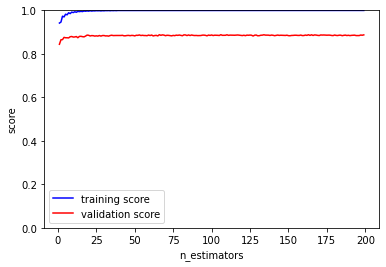

In [72]:
param_range = np.arange(1, 200)

train_score, val_score = validation_curve(RandomForestClassifier(), X_train, y_train,
                                                        param_name='n_estimators', 
                                                        param_range=param_range,
                                                        scoring='accuracy',cv=3, n_jobs=-1)
plt.plot(param_range, np.median(train_score, 1), color='blue', label='training score')
plt.plot(param_range, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()

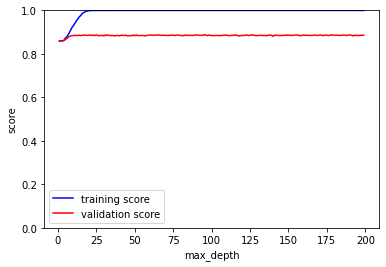

In [73]:
param_range = np.arange(1, 200)

train_score, val_score = validation_curve(RandomForestClassifier(), X_train, y_train,
                                                        param_name='max_depth', 
                                                        param_range=param_range,
                                                        scoring='accuracy',cv=3, n_jobs=-1)
plt.plot(param_range, np.median(train_score, 1), color='blue', label='training score')
plt.plot(param_range, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('max_depth')
plt.ylabel('score')
plt.show()

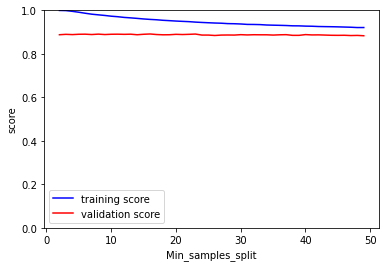

In [74]:
param_range = np.arange(1, 50)

train_score, val_score = validation_curve(RandomForestClassifier(), X_train, y_train,
                                                        param_name='min_samples_split', 
                                                        param_range=param_range,
                                                        scoring='accuracy',cv=10, n_jobs=-1)
plt.plot(param_range, np.median(train_score, 1), color='blue', label='training score')
plt.plot(param_range, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('Min_samples_split')
plt.ylabel('score')
plt.show()

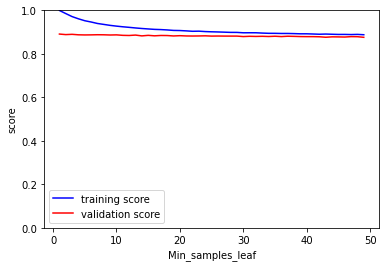

In [75]:
param_range = np.arange(1, 50)

train_score, val_score = validation_curve(RandomForestClassifier(), X_train, y_train,
                                                        param_name='min_samples_leaf', 
                                                        param_range=param_range,
                                                        scoring='accuracy',cv=10, n_jobs=-1)
plt.plot(param_range, np.median(train_score, 1), color='blue', label='training score')
plt.plot(param_range, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('Min_samples_leaf')
plt.ylabel('score')
plt.show()

In [76]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 2, stop = 26, num = 2)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(0, 25, num = 1)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [40, 50, 60]
# Minimum number of samples required at each leaf node
min_samples_leaf = [30, 35, 40]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [2, 26], 'max_features': ['auto', 'sqrt'], 'max_depth': [0, None], 'min_samples_split': [40, 50, 60], 'min_samples_leaf': [30, 35, 40], 'bootstrap': [True, False]}


In [78]:
rf_random = RandomizedSearchCV(RandomForestClassifier(), random_grid, n_iter = 100, cv = 10, verbose=1, 
                               random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.5min finished


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [0, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [30, 35, 40],
                                        'min_samples_split': [40, 50, 60],
                                        'n_estimators': [2, 26]},
                   random_state=42, verbose=1)

In [79]:
rf_random.best_params_

{'n_estimators': 26,
 'min_samples_split': 60,
 'min_samples_leaf': 30,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

In [80]:
random_model = RandomForestClassifier(n_estimators=26,min_samples_split=60,
                                             min_samples_leaf=30,max_features='auto',
                                             max_depth=None,bootstrap=False)
random_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, min_samples_leaf=30,
                       min_samples_split=60, n_estimators=26)

In [81]:
random_accuracy = random_model.score(X_train, y_train)
print("Evaluating the random model on the training set yields an accuracy of {}%".format(random_accuracy*100))
random_accuracy = random_model.score(X_test, y_test)
print("Evaluating the random model on the testing set yields an accuracy of {:.2f}%".format(random_accuracy*100))

Evaluating the random model on the training set yields an accuracy of 91.04747644893631%
Evaluating the random model on the testing set yields an accuracy of 88.90%


In [99]:
param_grid = {
    'bootstrap': [False],
    'max_depth': [None],
    'max_features': ['auto'],
    'min_samples_leaf': [25, 30, 35],
    'min_samples_split': [55, 60, 65],
    'n_estimators': [22, 24, 26, 28, 30]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv = 10, 
                           n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  4.6min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [None],
                         'max_features': ['auto'],
                         'min_samples_leaf': [25, 30, 35],
                         'min_samples_split': [55, 60, 65],
                         'n_estimators': [22, 24, 26, 28, 30]},
             verbose=2)

In [100]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 30,
 'min_samples_split': 60,
 'n_estimators': 26}

In [101]:
# Make prediction
y_pred = grid_model.predict(X_test)
print(y_pred)

[1 0 1 ... 0 0 0]


In [104]:
kf = KFold(n_splits=10)
cv_scores = cross_val_score(grid_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std()))
# the actual MSE is the number we get hear but positive

MSE: -0.12 (+/- 0.01)


In [105]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,2758,711,3469
1,66,473,539
All,2824,1184,4008


In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      3469
           1       0.40      0.88      0.55       539

    accuracy                           0.81      4008
   macro avg       0.69      0.84      0.71      4008
weighted avg       0.90      0.81      0.83      4008



In [107]:
y_scores = random_model.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
auc_prc = auc(recall, precision)
print(auc_prc)

# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold for Grid model=%f, F-Score=%.3f' % (thresholds[ix], 
                                                          fscore[ix]))

0.5726472925839564
Best Threshold for Grid model=0.309129, F-Score=0.576


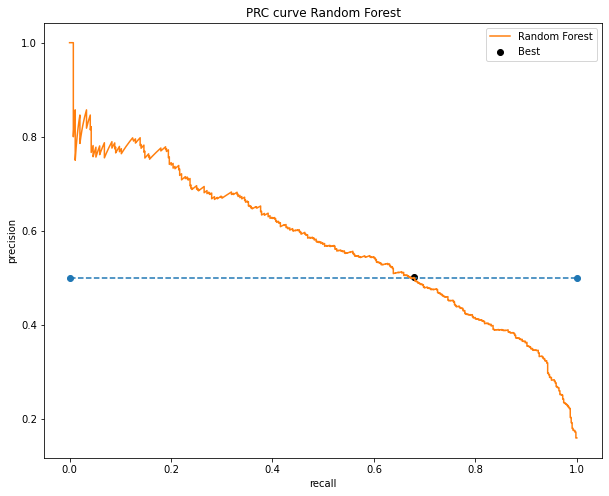

In [108]:
plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'o--')
plt.plot(recall, precision, label = 'Random Forest')
plt.scatter(recall[ix], precision[ix], marker='o', color='black', 
            label='Best')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PRC curve Random Forest')
plt.legend()
plt.show()

In [109]:
matthews_corr = matthews_corrcoef(y_test,y_pred)
print(matthews_corr)

0.5029682390046519


In [111]:
train_sizes = [1500, 2500, 4500, 6500, 8500, 10500]

train_sizes, train_scores, validation_scores = learning_curve(grid_model, X_train, y_train, 
                                                              train_sizes = train_sizes,
                                                              cv = 3, 
                                                              scoring = 'accuracy')

In [112]:
train_scores_mean = train_scores.mean(axis = 1)
print(train_scores_mean)
validation_scores_mean = validation_scores.mean(axis = 1)
print(validation_scores_mean)

[0.88       0.89853333 0.90637037 0.90764103 0.91219608 0.91257143]
[0.86000374 0.86755256 0.87416557 0.87740969 0.88109052 0.88158962]


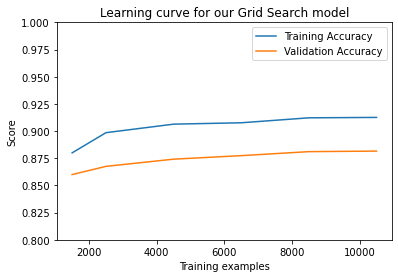

In [113]:
plt.plot(train_sizes, train_scores_mean, label = 'Training Accuracy')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation Accuracy')
plt.ylabel('Score')
plt.xlabel('Training examples')
plt.title('Learning curve for our Grid Search model')
plt.ylim(0.8,1)
plt.legend(loc='best')
plt.show()